In [5]:
## creating model

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

2025-06-30 22:27:25.266746: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-30 22:27:27.044229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751301747.627574   42905 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751301747.822508   42905 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751301749.161345   42905 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [7]:
model = Sequential([
    Conv2D(filters = 6, kernel_size = (5,5), strides = (1,1), padding='valid', activation='relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(filters = 16, kernel_size = (5,5), strides = (1,1), padding = 'valid', activation='relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
]
)

In [8]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

2025-06-30 22:27:36.638495: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
X_train.shape
y_train.shape

X_test.shape
y_test.shape

(10000,)

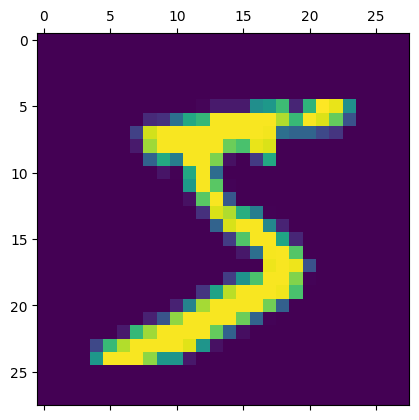

In [11]:
plt.matshow(X_train[0])

In [12]:
X_train.shape


(60000, 28, 28)

In [13]:
X_train = X_train/255
X_test = X_test / 255
print(X_train.shape)

(60000, 28, 28)


In [14]:
X_train_flattened = X_train.reshape(-1, 28, 28, 1)
X_test_flattened = X_test.reshape(-1, 28, 28, 1)

In [15]:
history = model.fit(x=X_train_flattened, y=y_train, batch_size=64, epochs=10, validation_data=(X_test_flattened, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8506 - loss: 0.5216 - val_accuracy: 0.9719 - val_loss: 0.0882
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9760 - loss: 0.0768 - val_accuracy: 0.9810 - val_loss: 0.0589
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9834 - loss: 0.0524 - val_accuracy: 0.9860 - val_loss: 0.0445
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9875 - loss: 0.0399 - val_accuracy: 0.9848 - val_loss: 0.0480
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9887 - loss: 0.0344 - val_accuracy: 0.9881 - val_loss: 0.0369
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9918 - loss: 0.0259 - val_accuracy: 0.9882 - val_loss: 0.0400
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9917 - loss: 0.0255 - val_accuracy: 0.9868 - val_loss: 0.0447
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.

In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9850 - loss: 0.0506


[0.03914975747466087, 0.9886999726295471]

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133,280 (520.63 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,854 (347.09 KB)

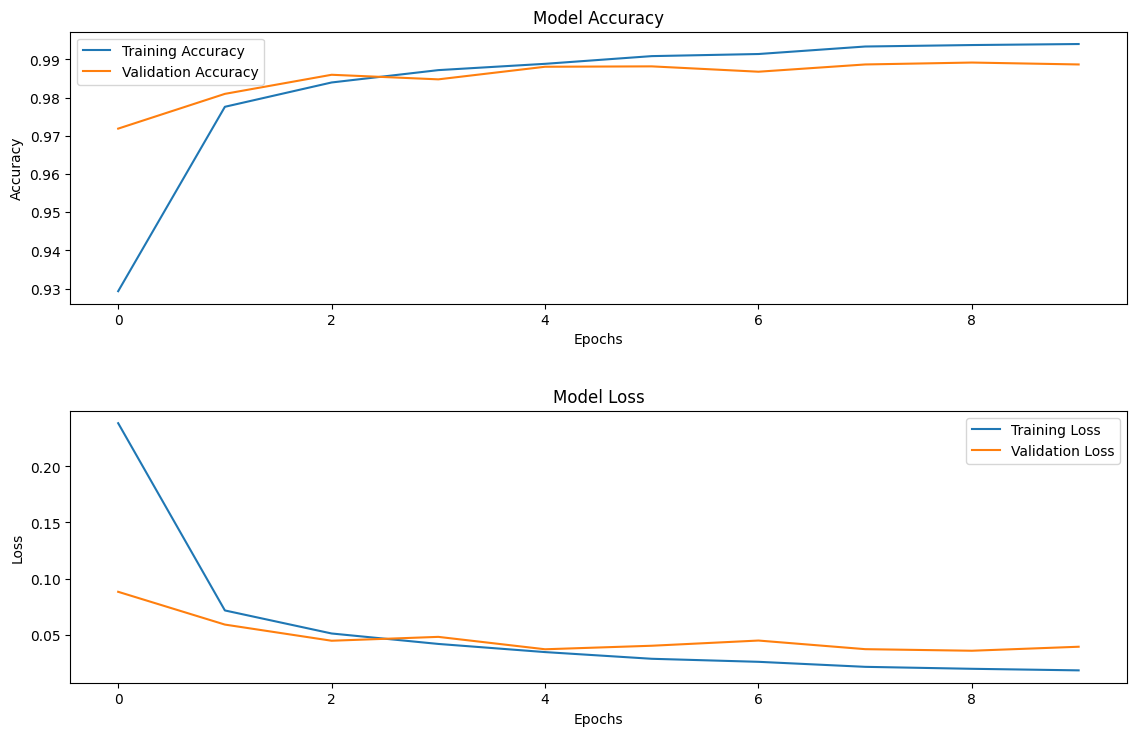

In [18]:
# plt.plot(history.history['val_accuracy'])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

plt.figure(figsize=(12, 8))

# Subplot for accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout(pad=3.0)  # Add padding between plots

# Subplot for loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout(pad=3.0)  # Ensure padding is applied
  

In [19]:
y_predicted = model.predict(X_test_flattened)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_predicted, axis=1)

# Import classification_report
from sklearn.metrics import classification_report

# Print precision, recall, f1-score for each class
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



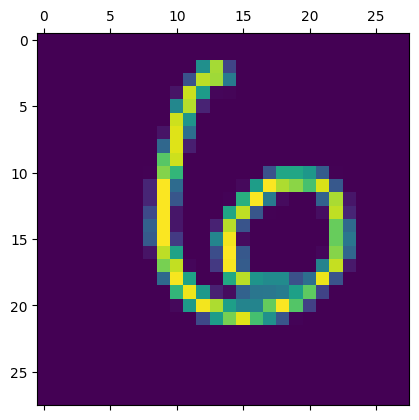

In [20]:
plt.matshow(X_test[100])

In [21]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
np.round(y_predicted[100],3)

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [23]:
np.argmax(np.round(y_predicted[100], 2))

np.int64(6)

### Confusion matrix

[[ 975    0    0    0    3    0    1    1    0    0]
 [   0 1130    1    1    0    1    1    0    1    0]
 [   1    2 1020    3    5    0    0    1    0    0]
 [   0    0    2  999    0    2    0    3    3    1]
 [   0    0    0    0  981    0    0    1    0    0]
 [   1    0    0    7    0  881    1    1    0    1]
 [   4    2    0    0    4    2  946    0    0    0]
 [   1    3    7    1    0    0    0 1014    1    1]
 [   2    0    2    2    1    2    0    3  959    3]
 [   2    1    2    0   14    3    0    4    1  982]]


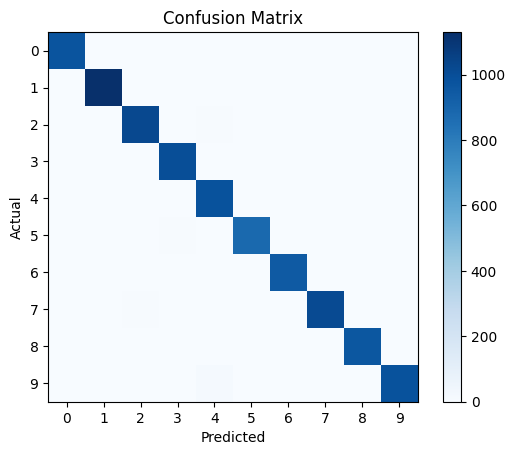

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(10), np.arange(10))
plt.yticks(np.arange(10), np.arange(10))
plt.grid(False)
plt.xticks(np.arange(10), np.arange(10))
plt.yticks(np.arange(10), np.arange(10))    
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')            
plt.show()